# The dataset contains transactions made by credit cards in September 2013 by European cardholders.
# ______________________________________________________________

### Highly imbalanced dataset as only 492 out of 284807 transactions are fraud.
### Only numerical columns are given which are the result of PCA transformation due to confidential issues.
### Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
### Transactions of almost two days are given to us

# ________________________________________________________________


## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### No NULL Values

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()
# Dataset is highly imbalanced dataset

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
X1 = df.drop(columns='Class', axis = 1)
Y1 = df['Class']

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, stratify = Y1, random_state= 2)

In [10]:
model = LR()

In [11]:
model.fit(x_train1, y_train1)

LogisticRegression()

In [12]:
y_pred1 = model.predict(x_test1)

**********************************************************************
Accuracy of the model is :  0.9990519995786665
R2 Score= 0.45
**********************************************************************
Confusion matrix of classifier : 
 [[56845    19]
 [   35    63]]


**********************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.64      0.70        98

    accuracy                           1.00     56962
   macro avg       0.88      0.82      0.85     56962
weighted avg       1.00      1.00      1.00     56962

**********************************************************************


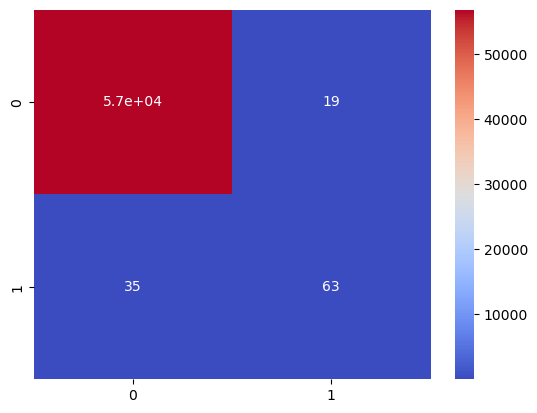

In [13]:
acc = accuracy_score(y_test1, y_pred1)
print("*******"*10)
print("Accuracy of the model is : ",acc)
print("R2 Score= %.2f"%r2_score(y_test1, y_pred1))
print("*******"*10)
# Confusion Matrix

cm=confusion_matrix(y_test1, y_pred1)
print("Confusion matrix of classifier : \n",cm)
print("\n")
sns.heatmap(cm, annot=True,cmap ='coolwarm')
print("*******"*10)
# Classification report of our model.

t=["0","1"]
print(classification_report(y_test1, y_pred1,target_names=t))
print("*******"*10)

## 0: Legit , 1: Fraud
## Amount is in USD 

In [14]:
# Seperating the data for Legit and Fraud transactions analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [15]:
legit.shape

(284315, 31)

In [16]:
fraud.shape

(492, 31)

In [17]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## As the data is unbalanced, we need to do UNDER-SAMPLING

### Extract 500 rows of legit transaction data and combine with fraud data

In [20]:
legit_sample = legit.sample(500)

In [21]:
# Conactinating the two data frames
df2 = pd.concat([legit_sample,fraud], axis = 0)

In [22]:
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
86134,61095.0,-1.506177,1.354365,0.990727,0.181707,-0.775254,-0.476344,-0.050705,0.901108,-0.673636,...,-0.010260,-0.121483,-0.050043,0.574940,-0.026600,0.198072,-0.054623,0.013401,28.26,0
135375,81225.0,0.511161,1.859354,-2.626504,1.332594,1.263983,-0.940850,0.463851,0.370103,-0.682404,...,-0.131964,-0.286178,-0.021169,-1.187111,-0.314099,-0.343383,0.126528,-0.069459,1.00,0
235984,148624.0,-1.508586,-0.244845,2.233236,-1.824078,-1.586355,0.330972,-1.362645,-0.304941,-0.192529,...,0.651513,0.046012,-0.114888,0.038834,-0.083090,0.928169,-0.397791,-0.203446,25.00,0
38338,39351.0,1.194707,0.267244,0.638101,0.640325,-0.383277,-0.691208,0.044099,-0.132304,-0.099323,...,-0.199362,-0.505904,0.197001,0.416350,0.127463,0.101425,-0.007039,0.020597,1.79,0
98696,66772.0,-1.024972,0.437540,2.699815,0.094743,0.271698,2.484341,0.171308,0.485751,0.368823,...,-0.048656,0.715153,-0.136953,-0.960409,-0.174666,0.527670,0.189910,-0.274945,56.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [23]:
df2['Class'].value_counts()

Class
0    500
1    492
Name: count, dtype: int64

In [24]:
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92231.246000,0.166384,-0.025424,0.064154,-0.009526,-0.070001,0.100148,-0.014553,0.040387,-0.128525,...,0.001885,0.020949,0.047711,-0.010686,-0.037913,0.040163,0.026084,-0.006692,0.009433,86.952780
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Spliting the data

In [25]:
X = df2.drop(columns='Class', axis = 1)
Y = df2['Class']

In [26]:
print(X)
print(Y)


            Time        V1        V2        V3        V4        V5        V6  \
86134    61095.0 -1.506177  1.354365  0.990727  0.181707 -0.775254 -0.476344   
135375   81225.0  0.511161  1.859354 -2.626504  1.332594  1.263983 -0.940850   
235984  148624.0 -1.508586 -0.244845  2.233236 -1.824078 -1.586355  0.330972   
38338    39351.0  1.194707  0.267244  0.638101  0.640325 -0.383277 -0.691208   
98696    66772.0 -1.024972  0.437540  2.699815  0.094743  0.271698  2.484341   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state= 2)

## Model training

In [28]:
model = LR()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
print(accuracy_score(y_pred, y_test))

0.9246231155778895


In [32]:
y_train_pred = model.predict(x_train)

In [33]:
print(accuracy_score(y_train_pred, y_train))
y_true = y_test

0.9457755359394704


**********************************************************************
Accuracy of the model is :  0.9246231155778895
R2 Score= 0.70
**********************************************************************
Confusion matrix of classifier : 
 [[97  3]
 [12 87]]


**********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       100
           1       0.97      0.88      0.92        99

    accuracy                           0.92       199
   macro avg       0.93      0.92      0.92       199
weighted avg       0.93      0.92      0.92       199

**********************************************************************


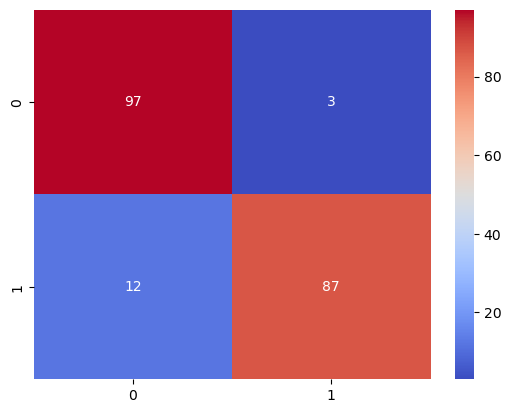

In [34]:
acc = accuracy_score(y_true, y_pred)
print("*******"*10)
print("Accuracy of the model is : ",acc)
print("R2 Score= %.2f"%r2_score(y_true, y_pred))
print("*******"*10)
# Confusion Matrix

cm=confusion_matrix(y_true, y_pred)
print("Confusion matrix of classifier : \n",cm)
print("\n")
sns.heatmap(cm, annot=True,cmap ='coolwarm')
print("*******"*10)
# Classification report of our model.

t=["0","1"]
print(classification_report(y_true, y_pred,target_names=t))
print("*******"*10)

# Prediction system is ready